In [1]:
#Name: Leonard Nkholise 
#date: 28 December 2021
#datasource link: https://royalsocietypublishing.org/doi/10.1098/rspb.2018.2400

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn import preprocessing

from matplotlib.colors import ListedColormap

# 1.0 Data Reading & Handling 

## 1.1 Read and assign filtered .csv data into program  

In [2]:
c_data = pd.read_csv("Allometry_all microvelia species.csv")

In [3]:
#longipes filtered out for distinct, non-overllaping clustering using k-means
c_data=c_data[c_data["Species"]!="longipes"]

In [4]:
x_data = c_data.iloc[:,[4,5]].values
y_data = c_data.loc[:,"Species"].values.reshape(-1,1)

## 1.2 Acquire the optimal number of clusters in data 

This is done using the "Elbow method" and WCSS (within-cluster sums of squares). The "elbow" is read from the "Elbow method" graph and the optimal cluster number obtained from doing so is regarded and used as the ideal number of clusters for the dataset.  

In [5]:
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state =42)
    kmeans.fit(x_data)
    wcss.append(kmeans.inertia_)

C:\Users\Leonard\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:

lab_enc=preprocessing.LabelEncoder()
y_data = lab_enc.fit_transform(y_data).reshape(-1,1)

C:\Users\Leonard\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Text(0, 0.5, 'wcss')

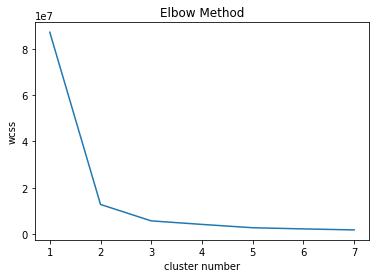

In [7]:
#The "elbow" appears to be at 3, indicating the likeliest possible cluster count as such
plt.plot(range(1,8),wcss)
plt.title("Elbow Method")
plt.xlabel("cluster number")
plt.ylabel("wcss")

## 1.3 Applying K-means clustering to the filtered water strider dataset

The previously predicted "ideal" cluster number or count is used to run a k-means cluster fit to the data, predicting the likeliest location of clusters in the data (Predicted water strider species), which, in this case correspond to the actual ones (Recorded Water strider species).

In [8]:
#Now to apply the K-means to the filtered water strider dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state =0)
y_means = kmeans.fit_predict(x_data)

## 1.4 Data analysis of K-means model

<p1>By removing the americana species from the dataset for easy model fitting, three out of four remaining distinct species of water-striders were predicted.Two water strider species seem to have been detected as one "cluster" using k-means clustering, the problem arises potentially due to indecisive over-lapping between the two contained clusters.</p1>

Text(0, 0.5, 'total leg length')

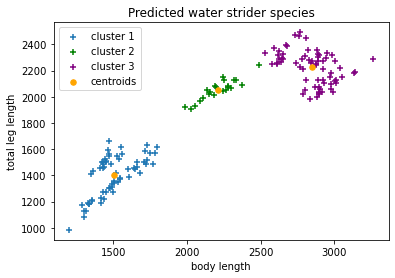

In [9]:
plt.scatter(x_data[y_means == 1,0],x_data[y_means == 1,1], label = "cluster 1", marker="+")
plt.scatter(x_data[y_means == 2,0],x_data[y_means == 2,1], label = "cluster 2", c = "green", marker="+")
plt.scatter(x_data[y_means == 0,0],x_data[y_means == 0,1], label = "cluster 3", c = "purple", marker = "+")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], label = "centroids" , s= 120,c = "orange", marker = ".")
plt.legend()
plt.title("Predicted water strider species")
plt.xlabel("body length")
plt.ylabel("total leg length")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'total leg length')

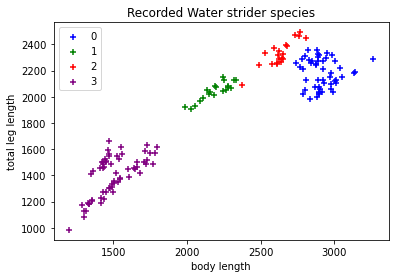

In [10]:
c_map = ListedColormap(("blue","green","red","purple"))

for idx, cl in enumerate(np.unique(y_data)):
 plt.scatter(x=x_data[y_data.ravel() == cl, 0], y=x_data[y_data.ravel() == cl, 1],
 alpha=1,
 marker="+", label=cl , c = c_map(idx) )
plt.legend()
plt.title("Recorded Water strider species")
plt.xlabel("body length")
plt.ylabel("total leg length")

3=pulchella, 2=mimulla ,1=coretypes & 0=americana are presented in the scatterplot above. 

<p>Given the effectiveness of the k-means clustering model in predicting the actual number of species within the water strider dataset, a conclusion can be made that indeed k-means is useful in the taxonomy of some creatures</p>

## 1.5 Conclusions

This technique of identifying insects with such accuracy using machine learning principles such as k-means clustering can potentially be used in pest control in agriculture on subspecies of insects of a similar trend. Oftentimes in agriculture, correctly identifying different species of pests in a region is necessary in order to avoid economic damage being sustained & also in retaining and identifying beneficial insects in said regions.  